In [1]:
%pylab
import importlib.util
import sys
sys.path.append('/Users/collinshuff/Documents/UVa-Fall18/CS4457/Networks-Final/radio/')
from receive import *
from decode import *
import config
import scipy.fftpack
import matplotlib.pyplot as plt
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
frequency = config.frequency
offset = config.offset
samp_rate = config.rec_samp_rate
baud = config.baud
samp_per_bit = samp_rate/baud

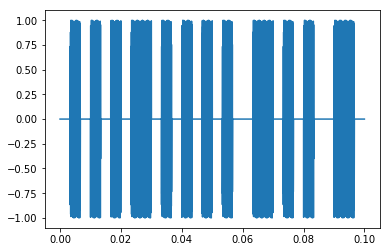

In [3]:
time = 1542837352
path = '/Users/collinshuff/Documents/UVa-Fall18/CS4457/Networks-Final/radio/samples'
samples = np.load(f'{path}/rec_{time}.npy')

time = 1542837346
path = '/Users/collinshuff/Documents/UVa-Fall18/CS4457/Networks-Final/radio/samples'
am_signal = np.load(f'{path}/am_signal_{time}.npy')
t = np.load(f'{path}/t_{time}.npy')
plt.plot(t, am_signal)



In [ ]:
fm_demodulated_wave, new_samp_rate = fm_demodulate(samples, frequency, offset, samp_rate)
plt.plot(fm_demodulated_wave)

start 1699
end 6775


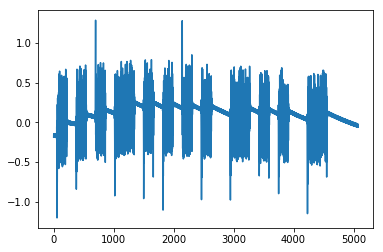

In [68]:
start = detect_transmission_start(fm_demodulated_wave)
end = len(fm_demodulated_wave) - detect_transmission_start(fm_demodulated_wave[::-1]) + 500
print('start', start)
print('end', end)
plt.plot(fm_demodulated_wave[start:end])

True


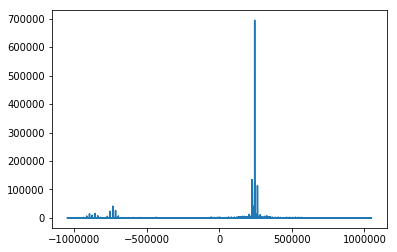

In [69]:
samples = samples[:samp_rate]
fft = scipy.fftpack.fft(samples)
freqs = scipy.fftpack.fftfreq(len(samples)) * samp_rate
plt.plot(freqs, np.abs(fft))
print(detect_transmitter_on(samples, samp_rate, offset))

avg 0.2606762226052788
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
15


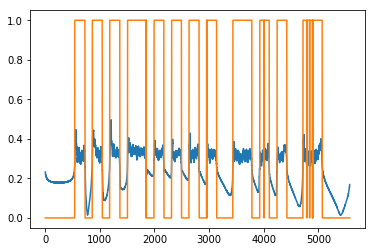

In [73]:
wave, new_samp_rate = fm_demodulate(samples, frequency, offset, samp_rate)
wave1 = wave[start-500:end]
samp_per_bit = new_samp_rate/baud
smoothed_wave = smooth(np.abs(wave1), window_len=21, window='flat')
envelope = get_envelope(smoothed_wave)[10:-10]
square_wave = binary_slicer(envelope)
plt.plot(envelope)
plt.plot(square_wave)
rec_bits = decode_manchester(square_wave, samp_per_bit, threshold=samp_per_bit/1.5)
print(rec_bits)
print(len(rec_bits))

In [7]:
[1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0] 

[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1]